In [1]:
import torch
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

## Sample from a 2d normal

In [2]:
mean = torch.zeros(2)
cov = torch.eye(2)
dist = torch.distributions.multivariate_normal.MultivariateNormal(mean, cov)

In [12]:
samples = dist.sample((100,))

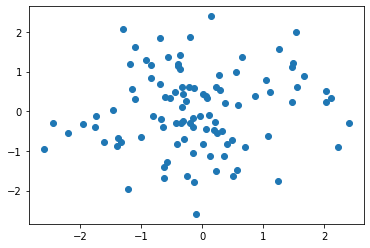

In [11]:
plt.scatter(samples[:, 0], samples[:, 1])

## Sample from a 2D gaussian mixture model

In [66]:
def sample_gmm(mix_probs, means, covs, nb_samples):
    all_samples = []
    all_sample_inds = []
    for ind, mix_prob in enumerate(mix_probs):
        comp_nb_samples = int(round(num_samples * mix_prob.item()))
        mean = means[ind]
        cov = covs[ind]
        dist = torch.distributions.multivariate_normal.MultivariateNormal(mean, cov)
        samples = dist.sample((comp_nb_samples,))
        all_samples.append(samples)
        sample_inds = torch.full((comp_nb_samples,), ind, dtype=torch.int)
        all_sample_inds.append(sample_inds)
        
    return torch.cat(all_samples), torch.cat(all_sample_inds)

In [64]:
def plot_gmm(sample_inds, samples):
    plt.scatter(samples[:, 0], samples[:, 1], c=sample_inds)
    plt.legend()

No handles with labels found to put in legend.


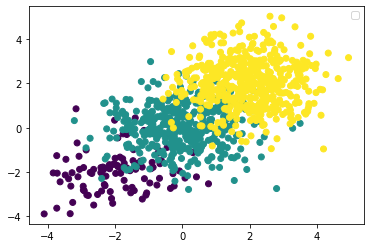

In [65]:
means = torch.tensor([
    [-2., -2.],
    [0., 0.],
    [2., 2.],
])
covs = torch.zeros((3, 2, 2))
covs[0, 0, 0] = covs[0, 1, 1] = 1
covs[1, 0, 0] = covs[1, 1, 1] = 1
covs[2, 0, 0] = covs[2, 1, 1] = 1
mix_probs = torch.tensor([0.1, 0.4, 0.5])
nb_samples = 1000

samples, sample_inds = sample_gmm(mix_probs, means, covs, nb_samples)

plot_gmm(sample_inds, samples)